In [1]:
# imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf

%matplotlib inline

In [4]:
# load data
path = '/mnt/d/projects/cards_project/pixel-reader/data'

path_train = os.path.join(path, 'train_zipped')
path_test = os.path.join(path, 'test_zipped')

train = pd.read_csv(os.path.join(path,'train_cards_label.csv'))
test = pd.read_csv(os.path.join(path,'test_cards_label.csv'))

print(train.shape)
print(test.shape)

(40089, 11)
(8004, 10)


In [11]:
dict(zip(train['label'], train['class']))

{3: '9s',
 28: 'Qc',
 36: '2h',
 49: '6s',
 20: 'Qd',
 45: '5s',
 31: 'Ac',
 21: 'Kd',
 44: '4h',
 2: '8s',
 18: '8d',
 9: '7h',
 33: '2s',
 27: '9c',
 30: '10c',
 19: '9d',
 7: 'As',
 39: '3d',
 6: '10s',
 4: 'Qs',
 17: '7d',
 8: 'Js',
 48: '5h',
 15: 'Ah',
 14: '10h',
 35: '2d',
 5: 'Ks',
 11: '9h',
 23: 'Ad',
 50: '6c',
 40: '3h',
 1: '7s',
 46: '5c',
 24: 'Jd',
 32: 'Jc',
 41: '4s',
 52: '6h',
 10: '8h',
 26: '8c',
 42: '4c',
 16: 'Jh',
 22: '10d',
 25: '7c',
 51: '6d',
 38: '3c',
 29: 'Kc',
 34: '2c',
 43: '4d',
 12: 'Qh',
 13: 'Kh',
 47: '5d',
 37: '3s'}

In [53]:
train.head(12)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,627194074.jpg,1080,1080,9s,82,724,147,752
1,627194074.jpg,1080,1080,Qc,85,584,153,640
2,627194074.jpg,1080,1080,2h,164,470,213,524
3,627194074.jpg,1080,1080,6s,276,380,315,443
4,627194074.jpg,1080,1080,Qd,395,342,433,409
5,627194074.jpg,1080,1080,5s,480,348,522,413
6,627194074.jpg,1080,1080,5s,532,652,576,719
7,968510760.jpg,1080,1080,Ac,82,723,147,752
8,968510760.jpg,1080,1080,5s,88,588,152,631
9,968510760.jpg,1080,1080,Kd,157,462,217,532


In [47]:
# utility functions
def display_image(row_index):
    rows = train.filename.unique().tolist()
    try:
        path = os.path.join(path_train, rows[row_index])
        image = cv2.imread(path)
        print(image.shape)
        plt.axis('off')
        plt.imshow(image)
        plt.show()
    except:
        print('Cannot find image at index {}'.format(row_index))

def show_training_example(row_index):
    try:
        image = cv2.imread(os.path.join(path_train, train.loc[row_index, 'filename']))
        plt.axis('off')
        y_min = train.loc[row_index, 'ymin']
        y_max = train.loc[row_index, 'ymax']
        x_min = train.loc[row_index, 'xmin']
        x_max = train.loc[row_index, 'xmax']
        print('image size : [{}, {}]'.format(x_max-x_min, y_max-y_min))
        plt.imshow(image[y_min:y_max, x_min:x_max])
        plt.show()
    except:
        print('Cannot find image at index {}'.format(row_index))

(1080, 1080, 3)


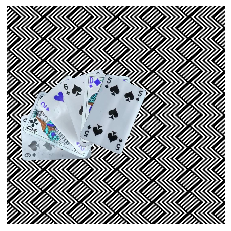

In [55]:
display_image(0)

### All below examples are from the single image file above 

image size : [65, 28]


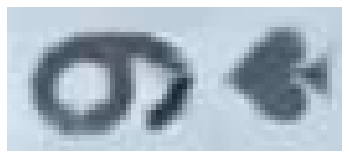

In [58]:
show_training_example(0)

image size : [68, 56]


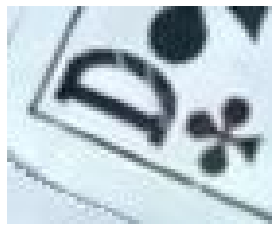

In [61]:
show_training_example(1)

image size : [49, 54]


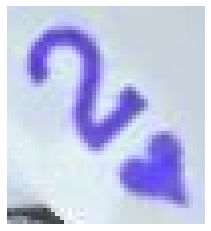

In [62]:
show_training_example(2)

image size : [39, 63]


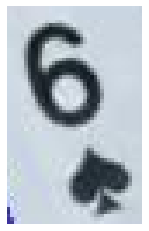

In [63]:
show_training_example(3)

image size : [38, 67]


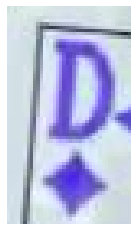

In [64]:
show_training_example(4)

image size : [42, 65]


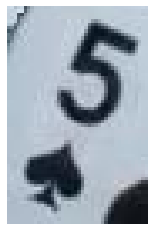

In [65]:
show_training_example(5)

In [5]:
def class_text_to_int(row_label):
    if row_label == '2s':
        return 33
    elif row_label == '2c':
        return 34
    elif row_label == '2d':
        return 35
    elif row_label == '2h':
        return 36
    elif row_label == '3s':
        return 37
    elif row_label == '3c':
        return 38
    elif row_label == '3d':
        return 39
    elif row_label == '3h':
        return 40
    elif row_label == '4s':
        return 41
    elif row_label == '4c':
        return 42
    elif row_label == '4d':
        return 43
    elif row_label == '4h':
        return 44
    elif row_label == '5s':
        return 45
    elif row_label == '5c':
        return 46
    elif row_label == '5d':
        return 47
    elif row_label == '5h':
        return 48
    elif row_label == '6s':
        return 49
    elif row_label == '6c':
        return 50
    elif row_label == '6d':
        return 51
    elif row_label == '6h':
        return 52
    elif row_label == '7s':
        return 1
    elif row_label == '8s':
        return 2
    elif row_label == '9s':
        return 3
    elif row_label == 'Qs':
        return 4
    elif row_label == 'Ks':
        return 5
    elif row_label == '10s':
        return 6
    elif row_label == 'As':
        return 7
    elif row_label == 'Js':
        return 8
    elif row_label == '7h':
        return 9
    elif row_label == '8h':
        return 10
    elif row_label == '9h':
        return 11
    elif row_label == 'Qh':
        return 12
    elif row_label == 'Kh':
        return 13
    elif row_label == '10h':
        return 14
    elif row_label == 'Ah':
        return 15
    elif row_label == 'Jh':
        return 16
    elif row_label == '7d':
        return 17
    elif row_label == '8d':
        return 18
    elif row_label == '9d':
        return 19
    elif row_label == 'Qd':
        return 20
    elif row_label == 'Kd':
        return 21
    elif row_label == '10d':
        return 22
    elif row_label == 'Ad':
        return 23
    elif row_label == 'Jd':
        return 24
    elif row_label == '7c':
        return 25
    elif row_label == '8c':
        return 26
    elif row_label == '9c':
        return 27
    elif row_label == 'Qc':
        return 28
    elif row_label == 'Kc':
        return 29
    elif row_label == '10c':
        return 30
    elif row_label == 'Ac':
        return 31
    elif row_label == 'Jc':
        return 32
    else:
        return 0

In [6]:
train['label'] = train['class'].map(class_text_to_int)

In [68]:
train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,label
0,627194074.jpg,1080,1080,9s,82,724,147,752,3
1,627194074.jpg,1080,1080,Qc,85,584,153,640,28
2,627194074.jpg,1080,1080,2h,164,470,213,524,36
3,627194074.jpg,1080,1080,6s,276,380,315,443,49
4,627194074.jpg,1080,1080,Qd,395,342,433,409,20


In [71]:
train['class'].value_counts()

4d     834
Qd     823
7h     818
6d     811
10d    810
9d     807
3s     807
Qh     804
Ac     804
Kh     798
9c     795
3d     790
10c    789
9s     789
8s     787
Kc     786
8c     783
Jd     777
Qs     777
5d     776
Qc     774
4h     774
7c     774
5s     773
Js     773
8d     769
Jc     768
4c     767
Ks     767
Ah     766
6c     764
8h     762
As     761
Kd     758
2h     757
7d     755
10h    755
7s     755
Jh     754
5h     752
3h     752
2c     749
2s     746
3c     746
5c     742
4s     739
6s     738
Ad     733
6h     731
2d     728
10s    726
9h     716
Name: class, dtype: int64

In [72]:
train.to_csv('data/train_cards_label.csv')

In [ ]:
for row in train.itterows():
    filename = row['filename']
    x_min = row['x_min']